In [7]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv(r'train_balanced_new.csv')
test = pd.read_csv(r'vectorized_test.csv')

In [9]:
train['label'], unique_labels = pd.factorize(train['label'])
test['label'], unique_labels = pd.factorize(test['label'])

In [10]:
X_train = train.drop(['label'], axis=1) 
y_train = train['label']
X_test = test.drop(['label'], axis=1)
y_test = test['label']

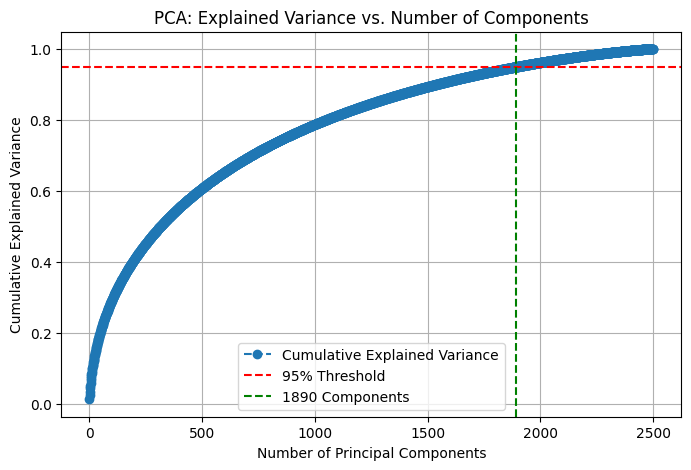

Number of components needed to retain 95% variance: 1890


In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.axvline(x=num_components, color='g', linestyle='--', label=f"{num_components} Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.legend()
plt.grid()
plt.show()
print(f"Number of components needed to retain 95% variance: {num_components}")

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

Original number of features: 2500
Reduced number of features: 1890


In [13]:
test['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}
model = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:24:54] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:24:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:24:56] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/training.py

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time= 4.7min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=14.5min
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.7; total time=  25.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time= 9.3min
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7; total time=15.1min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time= 5.2min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=  24.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=  23.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=3

/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/core.py:2676: UserWarning: [23:22:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/core.py:2676: UserWarning: [23:22:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/core.py:2676: UserWarning: [23:23:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set th

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best Score: 0.9274065685164213
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time= 4.8min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.7; total time=  30.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  24.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.7; total time=  24.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.7; total time=  23.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=  23.9s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.7; total time= 5.7min
[CV] END colsample_bytree=0.7, learnin

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

model = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7, tree_method='gpu_hist', gpu_id=0)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:06:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/core.py:2676: UserWarning: [00:07:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/long/longdata/.venv/lib/python3.11/site-packages/xgboost/core.py:729: UserWarning: [00:07:11] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory us

Accuracy: 0.8944275703253727
Balanced Accuracy: 0.8750600838091289
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      6716
           1       0.92      0.93      0.92      5417
           2       0.92      0.94      0.93      4560
           3       0.88      0.89      0.89      3788
           4       0.69      0.67      0.68      2036
           5       0.85      0.84      0.84      7567
           6       0.98      0.97      0.97      6667
           7       0.91      0.93      0.92      6250
           8       0.74      0.79      0.77      2096
           9       0.90      0.88      0.89      5276

    accuracy                           0.89     50373
   macro avg       0.87      0.88      0.87     50373
weighted avg       0.89      0.89      0.89     50373



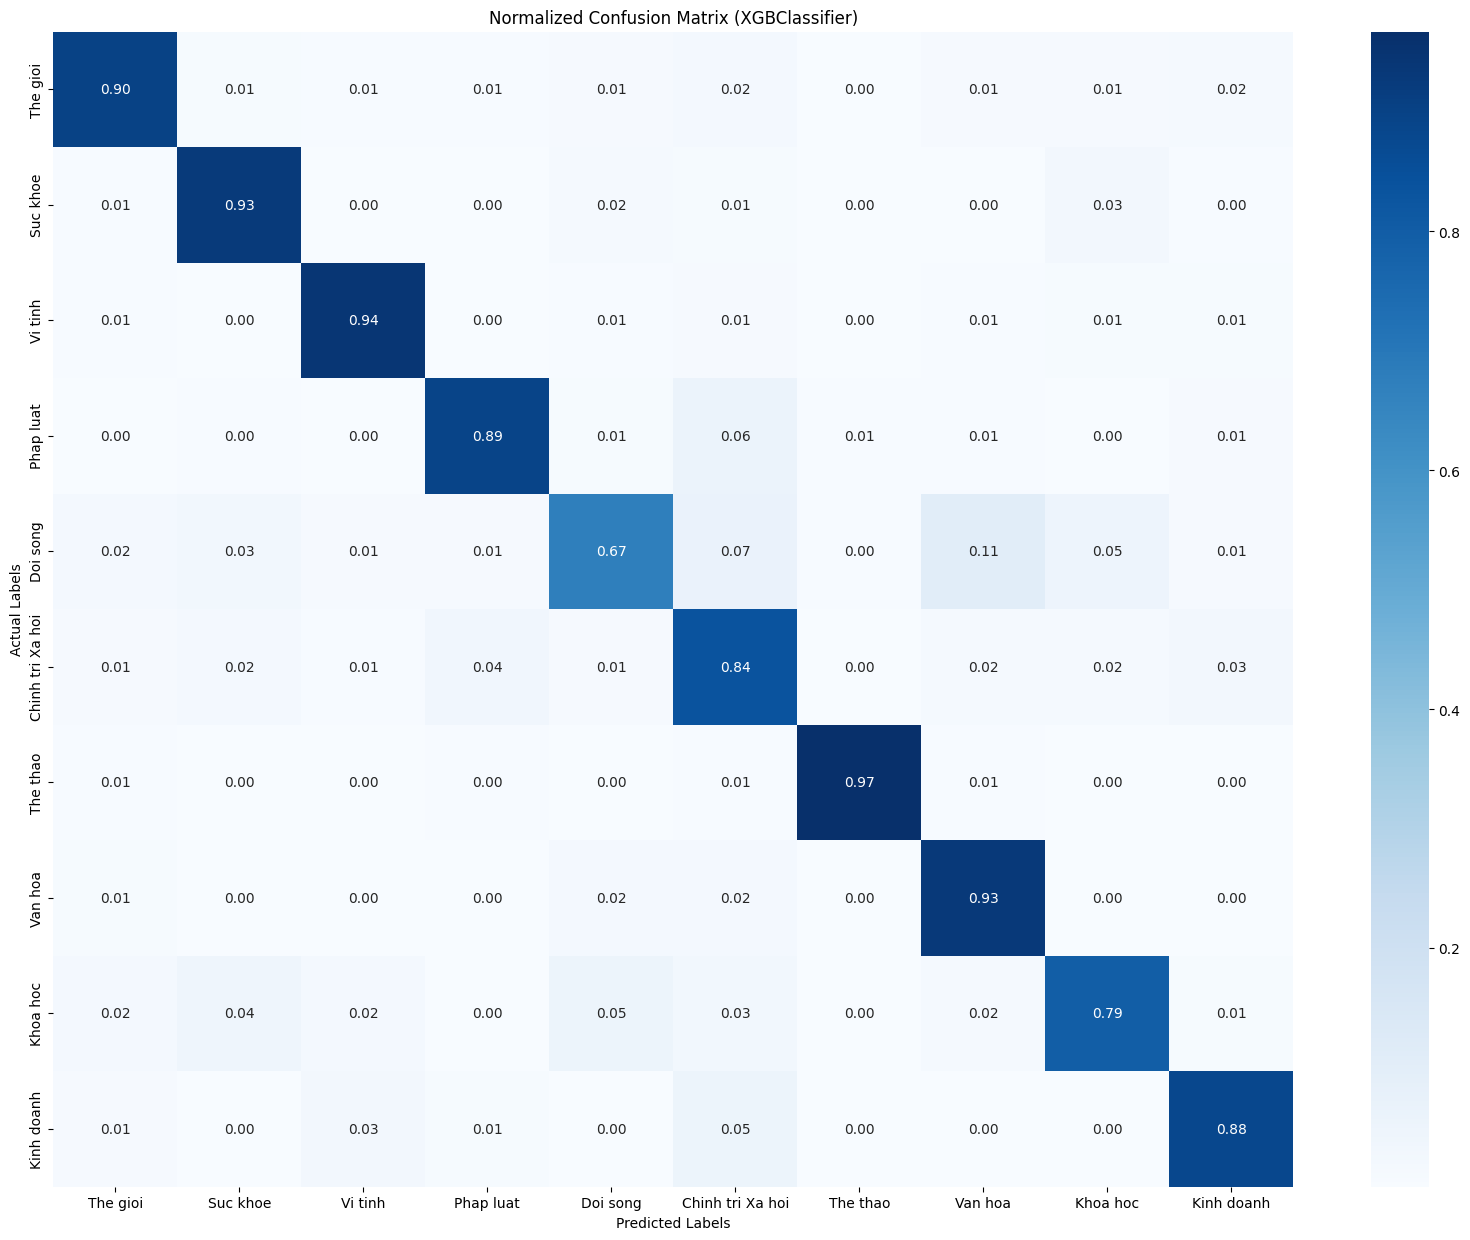

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

def normalize_confusion_matrix(cm, norm='true'):
    if norm == 'true':
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    elif norm == 'pred':
        cm_normalized = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
    elif norm == 'all':
        cm_normalized = cm.astype('float') / cm.sum()
    else:
        raise ValueError("Unknown normalization type. Use 'true', 'pred', or 'all'.")
    return cm_normalized

class_labels = np.unique(y_test)

plt.figure(figsize=(20, 15))
sns.heatmap(
    normalize_confusion_matrix(cm, norm='true'), 
    annot=True, fmt=".2f", cmap='Blues', 
    xticklabels=unique_labels, 
    yticklabels=unique_labels
)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Normalized Confusion Matrix (XGBClassifier)')
plt.show()

In [31]:
unique_labels

Index(['The gioi', 'Suc khoe', 'Vi tinh', 'Phap luat', 'Doi song',
       'Chinh tri Xa hoi', 'The thao', 'Van hoa', 'Khoa hoc', 'Kinh doanh'],
      dtype='object')

In [17]:
!nvidia-smi

Wed Mar 26 18:45:02 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        On  | 00000000:02:00.0 Off |                  N/A |
|  0%   41C    P8              11W / 170W |   1869MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
!kill 3802119      